<a href="https://colab.research.google.com/github/2303A52187/GENERATIVE_AI_2025/blob/main/2303A52187_GEN_AI_ASS_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/260


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5388 - loss: 0.6903 - val_accuracy: 0.5594 - val_loss: 0.6846
Epoch 2/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5513 - loss: 0.6850 - val_accuracy: 0.5594 - val_loss: 0.6840
Epoch 3/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5373 - loss: 0.6858 - val_accuracy: 0.5594 - val_loss: 0.6813
Epoch 4/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5310 - loss: 0.6832 - val_accuracy: 0.5594 - val_loss: 0.6775
Epoch 5/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5637 - loss: 0.6817 - val_accuracy: 0.5594 - val_loss: 0.6731
Epoch 6/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5548 - loss: 0.6728 - val_accuracy: 0.6750 - val_loss: 0.6712
Epoch 7/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6384 - loss: 0.6723 - val_accuracy: 0.6812 - val_loss: 0.6651
Epoch 8/260
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6762 - loss: 0.6665 - val_accuracy: 0.6625 - val_loss: 0.

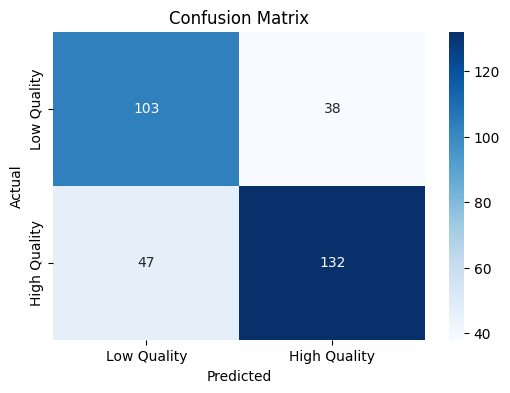

Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Low Quality


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("winequality.csv")  # Change to your dataset

# Split into features (X) and target (y)
X = data.iloc[:, :-1].values  # All columns except the last
y = data.iloc[:, -1].values   # Last column (target)

# Convert target to binary classification (e.g., good quality vs. bad quality)
y = (y >= 6).astype(int)  # Assuming quality >=6 is good (1), else bad (0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Define the ANN model
model = Sequential([
    Dense(16, activation="sigmoid", input_shape=(X_train.shape[1],)),
    Dense(24, activation="sigmoid"),
    Dense(10, activation="sigmoid"),
    Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=RMSprop(), loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=260, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Predict classes
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Low Quality", "High Quality"])

# Print results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Quality", "High Quality"],
            yticklabels=["Low Quality", "High Quality"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
model.save("wine_quality_ann_model.h5")
print("Model saved successfully!")

# Load the trained model and scaler
def load_trained_model():
    return load_model("wine_quality_ann_model.h5"), joblib.load("scaler.pkl")

# Predict function
def predict_wine_quality(input_data):
    model, scaler = load_trained_model()
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "High Quality" if prediction > 0.5 else "Low Quality"

# Example input
sample_input = [7.4, 0.7, 0.0, 1.9, 0.076, 11, 34, 0.9978, 3.51, 0.56, 9.4]  # Replace with real data
result = predict_wine_quality(sample_input)
print(f"Prediction: {result}")